In [2]:
# %% 1
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from pprint import pprint
import pylab as pl
from math import *
from random import random


In [3]:
# get data
data_dir="../cifar-10-batches-py/"
'''
data files contain three binary part.
batch_label: which represents the index of the dataset.
labels: which represents the category of the images, 
        the index of the row is also the row index of the image.
data: which is the image data that has 3072 columns, 
        the first 1024 columns represent the red channels of the 32x32 image, 
        the next 1024 columns represent the green one, 
        the last represent the blue one.
filenames: which is the name of the images.
'''
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def get_batch_data():
    batch_train=[]
    for i in range(1, 6):
        batch_train.append(unpickle(data_dir + "data_batch_" + i.__str__()))

    batch_test = unpickle(data_dir + "test_batch")
    return batch_train, batch_test

train_list,test_list= get_batch_data()
train_X = np.array(train_list[0].get(b'data'))
train_y=np.array(train_list[0].get(b'labels'))
for i in range(1,len(train_list)):
    train_X = np.concatenate((train_X,train_list[i].get(b'data')),axis=0)
    train_y = np.concatenate((train_y,train_list[i].get(b'labels')),axis=0)
X = train_X/500
test_X = np.array(test_list.get(b'data'))/500
test_y = np.array(test_list.get(b'labels'))
print("train: ",train_X.shape,train_y.shape)
print("test:  ",test_X.shape,test_y.shape)



train:  (50000, 3072) (50000,)
test:   (10000, 3072) (10000,)


In [4]:
X_train=X
Y_train=train_y
X_test=test_X
Y_test=test_y
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
num_examples, input_dim = X_train.shape

(50000, 3072) (50000,)
(10000, 3072) (10000,)


In [5]:
def calculate_loss(model, X, y):
    num_examples = X.shape[0]
    W1=model['W1']
    b1=model['b1']
    W2=model['W2']
    b2=model['b2']
    W3=model['W3']
    b3=model['b3']
    batch_size=64
    t=ceil(num_examples/batch_size)
    y_=[]
    for j in range(t):
        xx=X[batch_size*j:batch_size*(j+1)]    
        z1 = np.matmul(xx,W1)+ b1
        a1 = (abs(z1)+z1)/2                              
        z2 = np.matmul(a1,W2) + b2
        a2 = (abs(z2)+z2)/2                           
        z3 = np.matmul(a2,W3) + b3                    
        exp_scores = np.exp(z3)                     
        a3 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        if len(y_)==0:
            y_=a3
        else:
            y_=np.vstack([y_,a3])
    print(len(y_))
    print(len(y))        
    corect_logprobs = -np.log(y_[range(num_examples), y]+1e-10)
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += (reg_lambda / 2) * (np.sum(np.square(W1)) + np.sum(np.square(W2))+np.sum(np.square(W2)))
    return (1. / num_examples) * data_loss

In [6]:
def predict(model,x):
    W1=model['W1']
    b1=model['b1']
    W2=model['W2']
    b2=model['b2']
    W3=model['W3']
    b3=model['b3']

    z1 = np.matmul(x,W1)+ b1              
    a1 = (abs(z1)+z1)/2                                 
    z2 = np.matmul(a1,W2) + b2              
    a2 = (abs(z2)+z2)/2                              
    z3 = np.matmul(a2,W3) + b3                    
    exp_scores = np.exp(z3)
    a3 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(a3,1)

In [7]:
X=X_train
y=Y_train
nn_hdim=[100,50]
num_sample=X.shape[0]
input_dims=X.shape[1]
one_hot_y=np.eye(y.shape[0],y.max()-y.min()+1)[y]
print(one_hot_y.shape)
output_dims=one_hot_y.shape[1]
print('i: ',input_dims,' o: ',output_dims)
model={}
W1=np.random.randn(input_dims,nn_hdim[0])/10
b1=np.zeros((1,nn_hdim[0]))
W2=np.random.randn(nn_hdim[0],nn_hdim[1])/10
b2=np.zeros((1,nn_hdim[1]))
W3=np.random.randn(nn_hdim[1],output_dims)/10
b3=np.zeros((1,output_dims))
model={'W1':W1,'b1':b1,'W2':W2,'b2':b2,'W3':W3,'b3':b3}
batch_size=128

(50000, 10)
i:  3072  o:  10


In [8]:
train_acc=[]
test_acc=[]

In [9]:
epsilon = 0.001
reg_lambda = 1.0
epochs =20
batch_size=1000

In [11]:
n=ceil(num_examples/batch_size)
for i in range(epochs):
    for j in range(n):
        test_acc.append(np.equal(predict(model,X_test),Y_test).mean())
        train_acc.append(np.equal(predict(model,X_train),Y_train).mean())
        if j%5 ==0:
            print("test: ",test_acc[-1])
            print("train: ",train_acc[-1])
            print("ep: ",epsilon)
            print("\n")
        xx=X[batch_size*j:batch_size*(j+1)]
        yy=y[batch_size*j:batch_size*(j+1)]
        z1=np.matmul(xx,W1)+b1
        a1=(abs(z1)+z1)/2
        z2=np.matmul(a1,W2)+b2
        a2=(abs(z2)+z2)/2
        z3=np.matmul(a2,W3)+b3
        exp_scores=np.exp(z3)
        a3=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
        delta3=a3
        delta3[range(len(yy)),yy]-=1 # ^y -y
        dW3=np.matmul(a2.T,delta3)
        db3=np.sum(delta3,axis=0,keepdims=True)
        #delta2=np.matmul(delta3,W3.T)*(1-np.power(a2,2))
        temp=[[0 if temp2<=0 else 1 for temp2 in temp1] for temp1 in a2]
        delta2=np.matmul(delta3,W3.T)*np.array(temp)
        dW2=np.matmul(a1.T,delta2)
        db2=np.sum(delta2,axis=0)
        #delta1=np.matmul(delta2,W2.T)*(1-np.power(a1,2))
        temp=[[0 if temp2<=0 else 1 for temp2 in temp1] for temp1 in a1]
        delta1=np.matmul(delta2,W2.T)*np.array(temp)
        dW1=np.matmul(xx.T,delta1)
        db1=np.sum(delta1,axis=0)

        dW3+=reg_lambda*W3
        dW2+=reg_lambda*W2
        dW1+=reg_lambda*W1
        W1-=epsilon*dW1
        b1-=epsilon*db1
        W2-=epsilon*dW2
        b2-=epsilon*db2
        W3-=epsilon*dW3
        b3-=epsilon*db3
        epsilon=epsilon*0.99

test:  0.1135
train:  0.11648
ep:  0.001


test:  0.1596
train:  0.15836
ep:  0.0009509900498999999


test:  0.1347
train:  0.13636
ep:  0.0009043820750088043


test:  0.1028
train:  0.10166
ep:  0.0008600583546412883


test:  0.1307
train:  0.1346
ep:  0.0008179069375972306


test:  0.184
train:  0.18288
ep:  0.0007778213593991466


test:  0.1099
train:  0.11332
ep:  0.0007397003733882801


test:  0.182
train:  0.17936
ep:  0.000703447694999569


test:  0.112
train:  0.11328
ep:  0.0006689717585696801


test:  0.1601
train:  0.15996
ep:  0.0006361854860638707


test:  0.1314
train:  0.12676
ep:  0.0006050060671375363


test:  0.1563
train:  0.15912
ep:  0.0005753547499769285


test:  0.1406
train:  0.14316
ep:  0.0005471566423907612


test:  0.1537
train:  0.15512
ep:  0.0005203405226503064


test:  0.2186
train:  0.21806
ep:  0.000494838659600207


test:  0.1986
train:  0.19474
ep:  0.0004705866415856499


test:  0.244
train:  0.24024
ep:  0.0004475232137638106


test:  0.1637
train:

test:  0.3511
train:  0.35246
ep:  8.803111816824613e-07


test:  0.3514
train:  0.35236
ep:  8.371671745957318e-07


test:  0.3513
train:  0.35232
ep:  7.96137653143437e-07


test:  0.3512
train:  0.35236
ep:  7.571189864901461e-07


test:  0.3512
train:  0.35258
ep:  7.200126227425014e-07


test:  0.3511
train:  0.35238
ep:  6.847248400305212e-07


test:  0.351
train:  0.35248
ep:  6.511665097883948e-07


test:  0.3512
train:  0.35238
ep:  6.192528716368744e-07


test:  0.3514
train:  0.3524
ep:  5.889033192986695e-07


test:  0.3513
train:  0.35252
ep:  5.600411970061174e-07


test:  0.3511
train:  0.3525
ep:  5.325936058869033e-07


test:  0.3514
train:  0.35238
ep:  5.064912198388072e-07


test:  0.3513
train:  0.35236
ep:  4.81668110428419e-07


test:  0.3513
train:  0.35242
ep:  4.5806158037156093e-07


test:  0.3511
train:  0.3525
ep:  4.3561200517482357e-07


test:  0.351
train:  0.3524
ep:  4.142626825382445e-07


test:  0.3514
train:  0.35242
ep:  3.93959689138753e-07


test

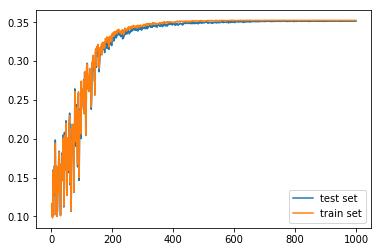

In [14]:
xa=np.linspace(1,len(test_acc),len(test_acc))
plt.plot(xa,test_acc,label='test set')
plt.plot(xa,train_acc,label='train set')
plt.legend(loc='best')

In [12]:
yp=predict(model,X_test)
print(np.equal(yp,Y_test).mean())

0.3513


In [23]:
len(acc)

40

In [24]:
x_axis=np.array([5*i for i in range(len(acc))])
acc=np.array(acc)

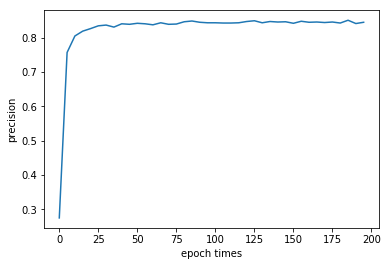

In [25]:
plt.xlabel("epoch times")
plt.ylabel("precision")
plt.plot(x_axis,acc)
plt.savefig("test5.png")

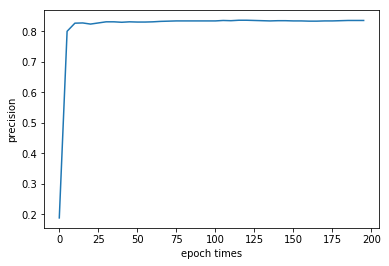

In [16]:
acc.max()

0.8366592756836659